In [1]:
# coding:utf-8
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


%matplotlib inline



In [2]:
train_user = pd.read_csv('data/table1_user',encoding='utf-8',index_col = False, delimiter='\t',
                                 )
train_user.head()

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience
0,17e1b9f107dd1214bd78dec6d91593a4,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,100002000,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0200104000,大专,24,2017,停车|现场|凤凰|预算编制|建设|实习|专家|公园|预算软件|勘察|合同|知识|商务|单位|...
1,0c02d9411e83ae0308cdc40700385d4c,763,"763,-,-",其他,化妆师,400106000,房地产/建筑/建材/工程,后期制作,0400106000,大专,24,2015,调色员|彩妆|护肤|布料|光源|客户|调色
2,1f4504451a08e1e99e0b394e03f24b43,530,"530,-,-","专业服务/咨询(财会/法律/人力资源等),教育/培训/院校","项目经理/项目主管,教学/教务管理人员,翻译（口译与笔译）",0,教育/培训/院校,项目管理/项目协调,1000115000,本科,33,2010,互联网参考模型osi七层|建设|英语|项目主管|签证|谈判|合同|crm系统|pl/sql|...
3,127b43572875dea9ed858da73a651433,871,"5085,-,-",房地产/建筑/建材/工程,行政/后勤/文秘,200104000,旅游/度假,行政/后勤/文秘,0200104000,大专,24,2017,行政|酒店|后勤|温泉|文员|文秘|旅游
4,15c607e1798305fb9f2e525d964a1185,530,"530,-,-","礼品/玩具/工艺美术/收藏品/奢侈品,教育/培训/院校,媒体/出版/影视/文化传播","艺术/设计,教育/培训",600108000,广告/会展/公关,艺术/设计,0600108000,大专,24,2015,上色|产品开发|插画|纸张|老师|制作|3dmax|美术|视觉设计|视觉|vi|道具|设计师...


In [3]:
train_job = pd.read_csv("data/table2_jd",delimiter="\t",error_bad_lines=False)
train_job.head()

b'Skipping line 173315: expected 18 fields, saw 20\n'
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,jd_no,jd_title,company_name,city,jd_sub_type,require_nums,max_salary,min_salary,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,3cf395f1d6f12de112d118c0349acbcd,景观主创设计师,-,530,园林/景观设计,2,25000,15000,20190325,20190524,1,510,NaN,本科,\N,\N,\N,岗位职责：1、全面负责景观项目的概念设计和方案设计、扩初设计和施工图设计的工作，同时对方案文...
1,4ce99de185f55bea127ccd74c4bbf0ad,土建工程造价员,-,551,工程造价/预结算,5,8000,4000,20190313,20190412,1,305,NaN,大专,\N,\N,NaN,1、能够独立完成工程概、预、结算的编制及审核工作；2、熟悉重庆地区相关计价原则及计价文件；3...
2,d1181ba44c2cba01523b143dbf264636,汽车销售,-,719,汽车销售,5,10000,8001,20190301,20190410,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、负责整车销售服务和进店客户咨询服务；2、负责整理各车型的销售资料及客户档案；3...
3,4e5da61aeffaba3dfea3bdd09dcce8d9,客服文员/网络客服5000＋,-,565,网络/在线客服,10,8000,4000,20190220,20191217,0,-1,NaN,\N,\N,\N,NaN,高薪线上推广专员（可接受优秀应届毕业生）岗位职责：1、为客户提供快速、准确与专业的咨询及服务...
4,db4d4ce28d394344a4bf93c18242e7d2,中安华筑技术标专员（五险+双休+早九晚五）,-,664,工程造价/预结算,5,6000,4001,20190318,20190417,0,103,NaN,大专,\N,\N,NaN,岗位职责：1、负责组织招标文件、投标文件的审批工作；2、参与投标活动，负责投标答辩资料的编纂...


In [4]:
train_action = pd.read_csv("data/table3_action",delimiter="\t")
train_action['mix_sat']  = train_action['satisfied']*10+train_action['delivered']*3
train_action.loc[train_action.mix_sat==13,'mix_sat'] =10
train_action.shape

(700938, 6)

In [5]:
test_action = pd.read_csv("data/zhaopin_round1_user_exposure_A_20190723",delim_whitespace=True)
test_action.head()

,user_id,jd_no
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609
4,035b5c8e977d2f76628d9b7edfc95323,5bc733283200a5d7b5cf3eb45cde4db7


In [6]:
test_user = pd.read_csv("data/user_ToBePredicted",delimiter="\t")
test_user.head()

,user_id,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,cur_degree_id,birthday,start_work_date,experience
0,0749d9a864562008d1f61fc9d14e1d28,531,"531,-,-","大型设备/机电设备/重工业,房地产/建筑/建材/工程,电气/电力/水利","项目经理/项目主管,房地产项目管理,项目专员/助理",600108000,大型设备/机电设备/重工业,项目管理/项目协调,0400106000,NaN,24,2016,互联网参考模型osi七层|文件|材料|项目管理|成本分析|风险|材料采购|工程部|保证|成本...
1,121cc4b0ea96666856c58ee25c2d945e,576,"530,576,854","房地产|建筑业,文化|传媒|娱乐|体育,环保","建筑制图,三维/3D设计/制作,设计管理人员",0,房地产/建筑/建材/工程,影视/媒体/出版/印刷,0800110000,本科,27,2012,三维|pr|ps|现场|bim|模型|建设|处理|知识|钢结构|施工人员|变更|动画|视频|...
2,19840deca71b87c132b9a3c55d22fc77,653,"664,-,-",其他,其他,400106000,房地产/建筑/建材/工程,工程监理/质量管理,0400106000,本科,27,2015,过程控制|现场|检查|人力|施工单位|工程|核对|工程师|图书馆|监理员|组团|土建|安全|...
3,20edcc2707909ab6bfc32fa72de7639f,719,"719,-,-","专业服务/咨询(财会/法律/人力资源等),房地产/建筑/建材/工程,信托/担保/拍卖/典当","出纳员,会计助理/文员",0,媒体/出版/影视/文化传播,财务/审计/税务,0400106000,本科,24,2017,账户|现场|收款|银行|对账|票据|office|采集|业务|责任心|单位|会计工作|沟通能...
4,154d443475ee8c77a2b3c8b26c5209f2,647,"647,-,-",房地产/建筑/建材/工程,"土木/建筑/装修/市政工程,房地产开发/经纪/中介",800110000,房地产/建筑/建材/工程,土木/建筑/装修/市政工程,0600108000,本科,30,2010,计划|环保|立项|现场|检测|建设|处理|房地产|合同|手续|责任心|建造师|变更|工程造价...


In [7]:
test_big_table = pd.merge(test_action,test_user,how="inner",on="user_id")
test_big_table = pd.merge(test_big_table,train_job,how="inner",on="jd_no")
test_big_table.head()

,user_id,jd_no,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,...,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190214,20190316,0,305,NaN,大专,\N,\N,NaN,岗位职责：1、规划并建立公司行政管理体系，制定并完成年度行政工作计划;2、对公司行政管理成本...
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190319,20190418,0,305,NaN,中技,\N,\N,NaN,技能：熟练掌握别克GL8驾驶技术，懂得车辆保养维护，熟悉长春市内道路。任职要求：给老板开车，...
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190307,20190406,0,-1,NaN,大专,\N,\N,NaN,岗位职责：1、负责办公室行政相关的工作；2、与工程业务相关的辅助性文职工作；3、公司资质的维...
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,20190314,20190423,0,103,NaN,中专,\N,\N,NaN,近期不在长春或不能参加面试者勿投！【工作时间】早8：30至16：00；周六周日双休，法定节假...
4,0e7587fca175bc2ac62f087f9d4c04c1,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","文体教育|工艺美术,交通|运输|物流|仓储,广告/会展/公关","行政专员/助理,文档/资料管理,文案策划",200104000,教育/培训/院校,行政/后勤/文秘,0200104000,...,20190314,20190423,0,103,NaN,中专,\N,\N,NaN,近期不在长春或不能参加面试者勿投！【工作时间】早8：30至16：00；周六周日双休，法定节假...


In [8]:
train_job.shape

(265690, 18)

In [9]:
train_job.drop_duplicates(inplace=True)
train_job.shape

(265690, 18)

In [10]:
train_action.drop_duplicates(inplace=True)
train_action.shape

(554425, 6)

In [11]:
test_action.drop_duplicates(inplace=True)
test_action.shape

(27470, 2)

In [12]:
train_action_df = pd.merge(train_action,train_job,how="left",on="jd_no")
train_action_df.shape

(554425, 23)

In [13]:
train_action_df[train_action_df['job_description'].isnull()]['browsed'].value_counts()

0    35786
1    12464
Name: browsed, dtype: int64

In [14]:
test_action_df = pd.merge(test_action,train_job,how="left",on="jd_no")
test_action_df.shape

(27470, 19)

In [15]:
test_action_df[test_action_df['job_description'].isnull()].shape

(2354, 19)

In [16]:
jd_action_series = train_action.groupby(['jd_no'])['user_id'].count()
jd_action =pd.DataFrame({'jd_no':jd_action_series.index, 'pos_cont':jd_action_series.values})
jd_action.head()

,jd_no,pos_cont
0,00000834df595b20d782da50774373de,1
1,0000159c17a3cebe9b7dbeaf36d6d421,2
2,000047b3a2eb46f9e2aff788fd0d7576,1
3,00007c87b9834dd4b4b04c60bff35d06,1
4,00007d58e2305573aac19eb37576124b,1


In [21]:
test_jd_action = pd.merge(test_action_df,jd_action,how="left",on="jd_no")
test_jd_action.shape

(27470, 20)

In [ ]:
test_jd_action[(test_jd_action['job_description'].isnull()) & (test_jd_action['pos_cont'].isnull()) ]

KeyError: 'job_description'

In [ ]:
test_action_df.head()

In [ ]:
test_action_df = pd.merge(test_action_df,train_job,how="left",on="jd_no")

In [19]:
train_action_df[train_action_df['job_description'].isnull()]

,user_id,jd_no,browsed,delivered,satisfied,mix_sat,jd_title,company_name,city,jd_sub_type,...,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description


In [24]:
test_action.drop_duplicates(inplace=True)
test_action.shape

(27470, 2)

In [27]:
test_action_df = pd.merge(test_action,train_job,how="inner",on="jd_no")

test_action_df.shape

(25116, 19)

In [ ]:
train_big_table = pd.merge(train_action,train_user,how="inner",on="user_id")
train_big_table = pd.merge(train_big_table,train_job,how="inner",on="jd_no")
train_big_table.head()

In [20]:
train_big_table = pd.merge(train_action,train_user,how="inner",on="user_id")
train_big_table = pd.merge(train_big_table,train_job,how="inner",on="jd_no")
train_big_table.head()

,user_id,jd_no,browsed,delivered,satisfied,mix_sat,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,...,start_date,end_date,is_travel,min_years,key,min_edu_level,max_edu_level,is_mangerial,resume_language_required,job_description
0,17e1b9f107dd1214bd78dec6d91593a4,4ce99de185f55bea127ccd74c4bbf0ad,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,1,305,NaN,大专,\N,\N,NaN,1、能够独立完成工程概、预、结算的编制及审核工作；2、熟悉重庆地区相关计价原则及计价文件；3...
1,17e1b9f107dd1214bd78dec6d91593a4,e9959d3b5fd8b26da07e8b8a3b80489a,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190318,20190417,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、根据招标方要求编制招标文件，负责报建等招标代理项目流程；2、负责组织现场答疑会...
2,04edcbfd579b127171e32d7e334f9368,e9959d3b5fd8b26da07e8b8a3b80489a,1,1,0,3,551,"551,551,551","电气/电力/水利,房地产/建筑/建材/工程","项目招投标,前台/总机/接待,内勤人员",...,20190318,20190417,1,-1,NaN,\N,\N,\N,NaN,岗位职责：1、根据招标方要求编制招标文件，负责报建等招标代理项目流程；2、负责组织现场答疑会...
3,17e1b9f107dd1214bd78dec6d91593a4,7ecd6ab0c7e43b40b7d1dbd4a9b1e6f5,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,0,1,NaN,大专,\N,\N,NaN,岗位职责：1.协助设计师完成方案图纸或施工图纸的绘制；2.协助设计师负责现场施工维护；3.协...
4,17e1b9f107dd1214bd78dec6d91593a4,112ea9c8ef92c1a7d5fa679cc6c05053,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,20190313,20190412,0,1,NaN,大专,\N,\N,NaN,岗位职责：1.协助设计师完成方案图纸或施工图纸的绘制；2.协助设计师负责现场施工维护；3.协...


In [45]:
def extract_city(citys,index):
    city_list = citys.split(",")
    if index < len(city_list):
        city = city_list[index]
        if city != "-":
            city = int(city)
        else:
            city = -1
    else:
        city = -1
    return city

def exp_in_desc(exp,desc):
    if str(exp) == "nan":
        exp = ""
    exps = exp.split("|")
    num = 0
    for item in exps:
        if item in desc:
            num+=1
    return num

In [46]:
min_year_dict = {
    305: 4,
    -1:-1,
    1:1,
    103:2,
    0:0,
    510:7,
    1099:10,
    399:4,
    599:7,
    199:1,
    299:2,
    110:1
}
degree_dict = {
    "初中":1,
    "中技":2,
    "高中":3,
    "中专":3,
    "大专":4,
    "本科":5,
    "硕士":6,
    "博士":7,
    "EMBA":7,
    "MBA":6,
    "其他":0,
    "请选择":0,
    "\\N":0,
    "na":0
}
min_salary_dict = {
    100002000:1000,
    400106000:4001,
    0:0,
    200104000:2001,
    600108000:6001,
    800110000:8001,
    1000115000:10001,
    2500199999:25001,
    1500125000:15001,
    3500150000:35001,
    70001100000:70001,
    1000:0,
    100001150000:100001,
    2500135000:25001,
    5000170000:50001
}
max_salary_dict = {
    100002000:2000,
    400106000:6000,
    0:0,
    200104000:4000,
    600108000:8000,
    800110000:10000,
    1000115000:15000,
    2500199999:99999,
    1500125000:25000,
    3500150000:50000,
    70001100000:100000,
    1000:1000,
    100001150000:150000,
    2500135000:35000,
    5000170000:70000
}

In [47]:
from functools import partial
def fe(df):
    df["desire_jd_city_1"] = df["desire_jd_city_id"].apply(partial(extract_city,index=0))
    df["desire_jd_city_2"] = df["desire_jd_city_id"].apply(partial(extract_city,index=1))
    df["desire_jd_city_3"] = df["desire_jd_city_id"].apply(partial(extract_city,index=2))
    df["desire_jd_city_num"] = df[["desire_jd_city_1","desire_jd_city_2","desire_jd_city_3"]].sum(axis=1)
    
    df["city_equal_desired_city_1"] = df["desire_jd_city_1"]==df["city"]
    df["city_equal_desired_city_2"] = df["desire_jd_city_2"]==df["city"]
    df["city_equal_desired_city_3"] = df["desire_jd_city_3"]==df["city"]
    
    df["work_years"] = 2019-df["start_work_date"].apply(lambda x : 2018 if x=="-" else int(x))
    
    
    df["desire_min_salary"] = df["desire_jd_salary_id"].apply(lambda x: min_salary_dict[x])
    df["desire_max_salary"] = df["desire_jd_salary_id"].apply(lambda x: max_salary_dict[x])
    df["desire_salary_diff"] = df["desire_max_salary"]-df["desire_min_salary"]
    
    df["min_years"] = df["min_years"].apply(lambda x: min_year_dict[x])
    
    df["work_years_statisfied"] = df["work_years"].astype(int) > df["min_years"]
    
    df["salary_large_than_desire"] = df["desire_min_salary"] > df["min_salary"]
    
    df["cur_salary_min"] = df["cur_salary_id"].apply(lambda x: min_salary_dict[int(x if str.isnumeric(x) else "0")])
    df["cur_salary_max"] = df["cur_salary_id"].apply(lambda x: max_salary_dict[int(x if str.isnumeric(x) else "0")])
    
    df["salary_large_than_cur"] = df["cur_salary_min"] > df["min_salary"]
    
    df["cur_degree_id"] = df["cur_degree_id"].fillna("na").apply(lambda x:degree_dict[x.strip()])
    
    df["job_description_len"] = df["job_description"].apply(len)
    
    df["experience_num"] = df["experience"].apply(lambda x: len(str(x).split("|")) if str(x) != "nan" else 0)
    
    df["min_edu_level"] = df["min_edu_level"].fillna("na").apply(lambda x:degree_dict[x.strip()])
    exp_in_desc_num = []
    for idx, data in df.iterrows():
        exp_in_desc_num.append(exp_in_desc(data["experience"],data["job_description"]))
    df["exp_in_desc_num"] = exp_in_desc_num
    
#     "live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
#          "cur_degree_id","city","jd_sub_type",
#          "max_salary","min_salary","is_travel","min_years","min_edu_level",
#          "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"
    cross_feature_tuple = [("live_city_id","city"),("live_city_id","desire_jd_city_1"),("cur_industry_id","jd_sub_type"),
                          ("cur_jd_type","jd_sub_type"),("cur_salary_id","cur_degree_id"),("city","jd_sub_type"),
                          ("jd_sub_type","min_salary"),("jd_sub_type","max_salary"),("jd_sub_type","is_travel"),
                          ("min_years","jd_sub_type"),("jd_sub_type","require_nums")]
    cross_feature_names = list(feature[0]+"&"+feature[1] for feature in cross_feature_tuple)
    print("create cross features",cross_feature_names)
    for idx,(fa,fb) in enumerate(cross_feature_tuple):
        df[cross_feature_names[idx]] = df[fa].astype(str)+df[fb].astype(str)
    return cross_feature_names

In [48]:
cross_feature_names = fe(train_big_table)
fe(test_big_table)

create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']
create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']


['live_city_id&city',
 'live_city_id&desire_jd_city_1',
 'cur_industry_id&jd_sub_type',
 'cur_jd_type&jd_sub_type',
 'cur_salary_id&cur_degree_id',
 'city&jd_sub_type',
 'jd_sub_type&min_salary',
 'jd_sub_type&max_salary',
 'jd_sub_type&is_travel',
 'min_years&jd_sub_type',
 'jd_sub_type&require_nums']

In [49]:
train_big_table = train_big_table.drop_duplicates()
test_big_table = test_big_table.drop_duplicates()

In [50]:
all_big_table = pd.concat([train_big_table,test_big_table])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [51]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm as tqdm
import lightgbm as lgb

In [52]:
def feature_select(target,*df_list):
    result = []
    cat_features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
         "cur_degree_id","city","jd_sub_type",
         "max_salary","min_salary","is_travel","min_years","min_edu_level",
         "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"]+cross_feature_names
    lbl_dict = {}
    for f in cat_features:
        lbl = LabelEncoder()
        lbl.fit(all_big_table[f].astype(str))
        lbl_dict[f] = lbl
    for df in df_list:
        features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names

        x = df[features]
        if target in df.columns:
            y = df[target]
        else:
            y = None
        for f in cat_features:
            lbl = lbl_dict[f]
            x[f] = lbl.transform(x[f].astype(str))
        result.append((x,y))
    return result

In [53]:
train_big_table.groupby("user_id",as_index=False).count()["satisfied"].values

array([131,  95,   9, ..., 211, 174, 114])

In [56]:
from sklearn.model_selection import KFold

def cross_validate(param=dict(n_estimators=1000,metric="map",colsample_bytree=0.2,max_depth=7,importance_type="gain")
                   ,n_folds=5,target="mix_sat"):
    train_users = train_big_table["user_id"].unique()
    folds = KFold(n_folds,shuffle=True,random_state=42)
    models = []
    test_pred = np.zeros(test_big_table.shape[0])
    scores = []
    for idx,(train_idx,valid_idx) in enumerate(folds.split(train_users)):
        t_user = train_users[train_idx]
        v_user = train_users[valid_idx]
        train_data = train_big_table[train_big_table["user_id"].isin(t_user)]
        valid_data = train_big_table[train_big_table["user_id"].isin(v_user)]
        train_group = train_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        valid_group = valid_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        test_group = test_big_table.groupby("user_id",as_index=False).count()["jd_no"].values
        
        result = feature_select(target,train_data,valid_data,test_big_table)
        t_x,t_y = result[0]
        v_x,v_y = result[1]
        test_x,_ = result[2]
        model = lgb.LGBMRanker(**param)
        print("Fold",idx,"-"*30)
        model.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
                  callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.01)]
                 )
        models.append(model)
        test_pred += model.predict(test_x)/n_folds
        scores.append(model.best_score_["valid_1"]["g@1"])
    print("mean score",np.mean(scores))
    return models,test_pred

In [57]:
models,pred = cross_validate(target="mix_sat",param=dict(n_estimators=1000,metric="map",subsample=0.8,min_split_gain=10,colsample_bytree=0.8,max_depth=2,importance_type="gain"),n_folds=5)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 0 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's map@1: 0.195773	valid_1's map@1: 0.177976
[20]	training's map@1: 0.204116	valid_1's map@1: 0.182425
[30]	training's map@1: 0.202447	valid_1's map@1: 0.179088
[40]	training's map@1: 0.201891	valid_1's map@1: 0.177976
[50]	training's map@1: 0.201057	valid_1's map@1: 0.1802
[60]	training's map@1: 0.200222	valid_1's map@1: 0.1802
[70]	training's map@1: 0.200501	valid_1's map@1: 0.176863
[80]	training's map@1: 0.199944	valid_1's map@1: 0.176863
[90]	training's map@1: 0.197164	valid_1's map@1: 0.173526
[100]	training's map@1: 0.197998	valid_1's map@1: 0.175751
[110]	training's map@1: 0.198554	valid_1's map@1: 0.174638
[120]	training's map@1: 0.198554	valid_1's map@1: 0.175751
Early stopping, best iteration is:
[20]	training's map@1: 0.204116	valid_1's map@1: 0.182425
Fold 1 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	train

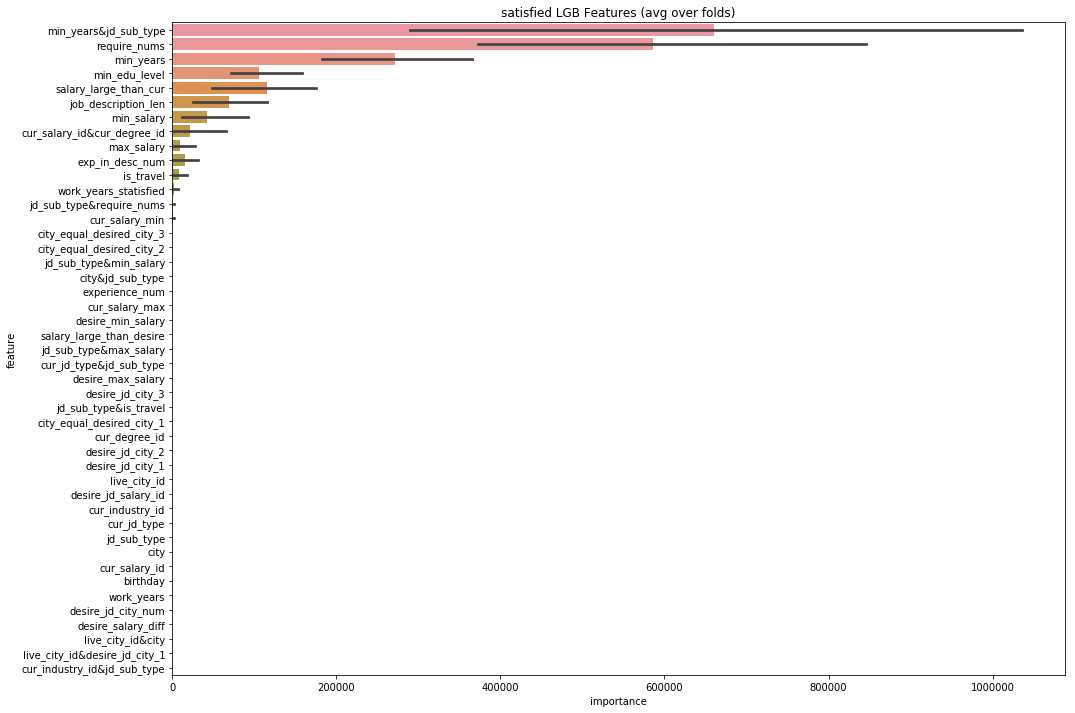

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame()
for idx,model in enumerate(models):
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","birthday","city","jd_sub_type","require_nums",
             "max_salary","min_salary","is_travel","min_years","min_edu_level",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "city_equal_desired_city_1","city_equal_desired_city_2","city_equal_desired_city_3",
                   "desire_min_salary","desire_max_salary","salary_large_than_desire","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num","desire_salary_diff"]+cross_feature_names
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = idx
    feature_importance = pd.concat([feature_importance,fold_importance])
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False));
plt.title('satisfied LGB Features (avg over folds)');

In [61]:
feature_importance.groupby(['feature'])['importance'].mean()

feature
birthday                              0.000000
city                                  0.000000
city&jd_sub_type                      0.000000
city_equal_desired_city_1             0.000000
city_equal_desired_city_2             0.000000
city_equal_desired_city_3             0.000000
cur_degree_id                         0.000000
cur_industry_id                       0.000000
cur_industry_id&jd_sub_type           0.000000
cur_jd_type                           0.000000
cur_jd_type&jd_sub_type               0.000000
cur_salary_id                         0.000000
cur_salary_id&cur_degree_id       21876.927879
cur_salary_max                        0.000000
cur_salary_min                      626.977979
desire_jd_city_1                      0.000000
desire_jd_city_2                      0.000000
desire_jd_city_3                      0.000000
desire_jd_city_num                    0.000000
desire_jd_salary_id                   0.000000
desire_max_salary                     0.000000
desir

In [33]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
result[["user_id","jd_no"]].to_csv("submission.csv",index=False)

/Users/zhuangzhuanghuang/miniconda2/envs/3point6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
